# Data Exploration Notebook

In [2]:
# 1_data_exploration.ipynb

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import cv2
import random

import sys
sys.path.append("../src")  # so we can import config + dataset
import config as cfg
import dataset as ds


# 1. Basic dataset info

In [3]:
print("Project root:", cfg.PROJECT_ROOT)
print("Train images:", len(list(cfg.TRAIN_IMG_DIR.glob('*.png'))))
print("Train masks:", len(list(cfg.TRAIN_MASK_IMG_DIR.glob('*.png'))))
print("Test images:", len(list(cfg.VAL_IMG_DIR.glob('*.png'))))
print("Test masks:", len(list(cfg.VAL_MASK_IMG_DIR.glob('*.png'))))


Project root: D:\PycharmProjects\Fetal Head Ultrasound Segmentation
Train images: 999
Train masks: 999
Test images: 335
Test masks: 335


# 2. Visualize some random samples

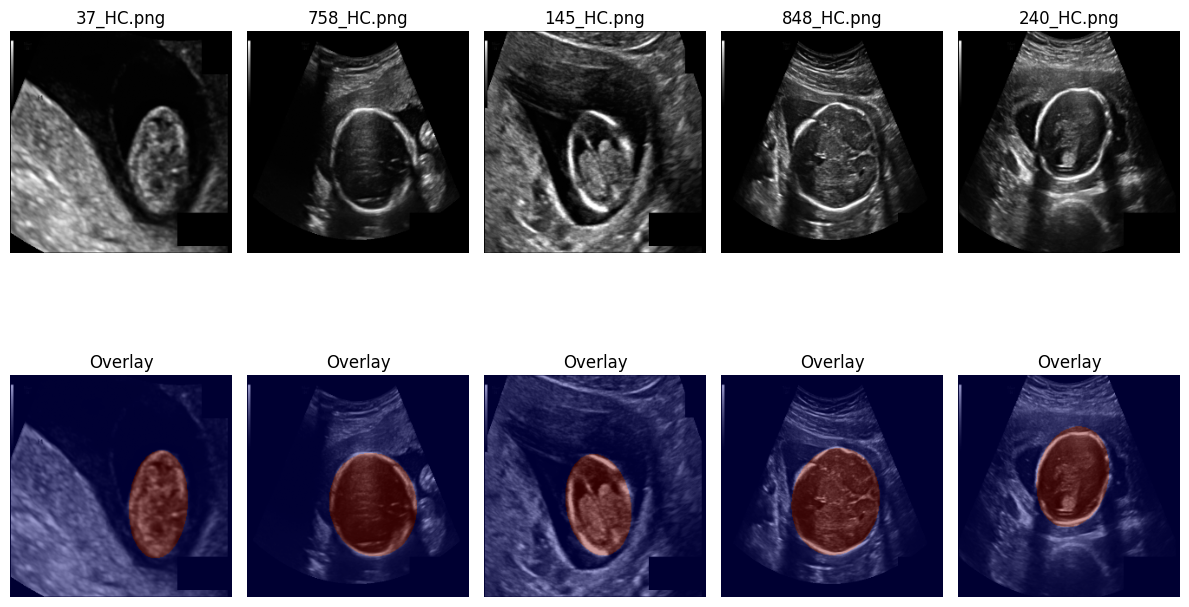

In [4]:
# Pick random training samples
train_imgs = sorted(cfg.TRAIN_IMG_DIR.glob("*.png"))
train_masks = sorted(cfg.TRAIN_MASK_IMG_DIR.glob("*.png"))

indices = random.sample(range(len(train_imgs)), 5)

plt.figure(figsize=(12, 8))
for i, idx in enumerate(indices):
    img_path, mask_path = train_imgs[idx], train_masks[idx]
    img, mask = ds.load_image_mask(img_path, mask_path, cfg.IMG_SIZE)

    plt.subplot(2, 5, i+1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(img_path.name)
    plt.axis("off")

    plt.subplot(2, 5, i+6)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.imshow(mask.squeeze(), cmap="jet", alpha=0.4)
    plt.title("Overlay")
    plt.axis("off")
plt.tight_layout()
plt.show()


# 3. Dataset statistics
- Pixel intensity distribution of images
- Foreground (mask=1) vs background (mask=0) ratio

Mean pixel intensity: 0.17540938732670774
Std pixel intensity: 0.17635065115227275
Foreground ratio (avg % of mask covered): 23.262222111225128 %


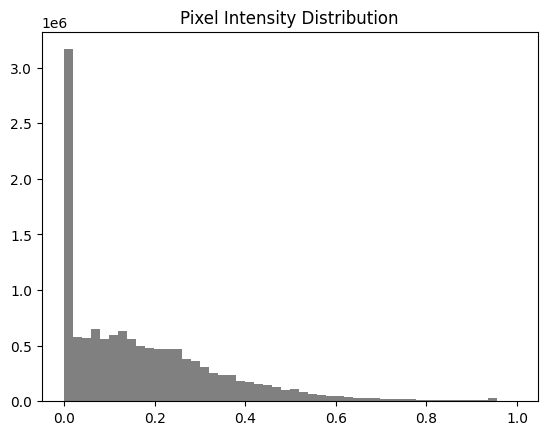

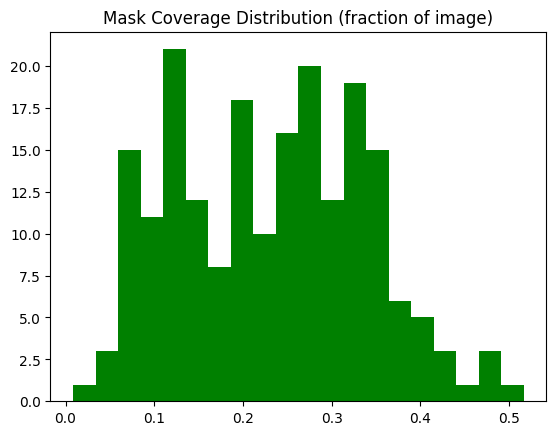

In [5]:
all_imgs = list(cfg.TRAIN_IMG_DIR.glob("*.png"))
all_masks = list(cfg.TRAIN_MASK_IMG_DIR.glob("*.png"))

pixel_values = []
mask_ratios = []

for img_path, mask_path in zip(all_imgs[:200], all_masks[:200]):  # sample 200 to keep it fast
    img, mask = ds.load_image_mask(img_path, mask_path, cfg.IMG_SIZE)
    pixel_values.extend(img.flatten())
    mask_ratios.append(mask.mean())

print("Mean pixel intensity:", np.mean(pixel_values))
print("Std pixel intensity:", np.std(pixel_values))
print("Foreground ratio (avg % of mask covered):", np.mean(mask_ratios)*100, "%")

plt.hist(pixel_values, bins=50, color="gray")
plt.title("Pixel Intensity Distribution")
plt.show()

plt.hist(mask_ratios, bins=20, color="green")
plt.title("Mask Coverage Distribution (fraction of image)")
plt.show()


# 4. Train/Validation split overview

In [9]:
train_ds, val_ds = ds.get_datasets()

print("Train batches:", len(list(train_ds)))
print("Val batches:", len(list(val_ds)))


Train batches: 100
Val batches: 25
